In [1]:
# dependencies and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read, clean up, and display GDP data set
stock_data = pd.read_csv('../data/stock-by-year.csv')

# remove 2019 because this year is incomplete
stock_data = stock_data.drop(stock_data.index[708:])
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/1960,59.910000,60.389999,55.610001,55.610001,55.610001,"63,920,000"
1,2/1/1960,55.959999,56.820000,54.730000,56.119999,56.119999,"60,500,000"
2,3/1/1960,56.009998,56.009998,53.470001,55.340000,55.340000,"65,710,000"
3,4/1/1960,55.430000,56.590000,54.369999,54.369999,54.369999,"57,300,000"
4,5/1/1960,54.130001,55.830002,54.130001,55.830002,55.830002,"68,790,000"


In [18]:
# split year from full date (we want years instead of quarters)
stock_data[["Month", "Day", "Year"]] = stock_data["Date"].str.split("/", expand=True)

# calculate total gdp per year
yearly_stock = stock_data.groupby(["Year"]).mean()

# set index and display
yearly_stock = yearly_stock.reset_index('Year')

# calculate x and y 
years = yearly_stock["Year"].astype(int)
dollars = yearly_stock["High"]

yearly_stock.head()

,Year,Open,High,Low,Close,Adj Close
0,1960,55.800833,57.131667,54.250833,55.601666,55.601666
1,1961,65.690000,67.532500,64.964168,66.653334,66.653334
2,1962,62.660000,64.490833,59.265833,61.955833,61.955833
3,1963,69.234167,71.263334,67.980833,70.218334,70.218334
4,1964,80.735834,82.615833,79.932500,81.546668,81.546668


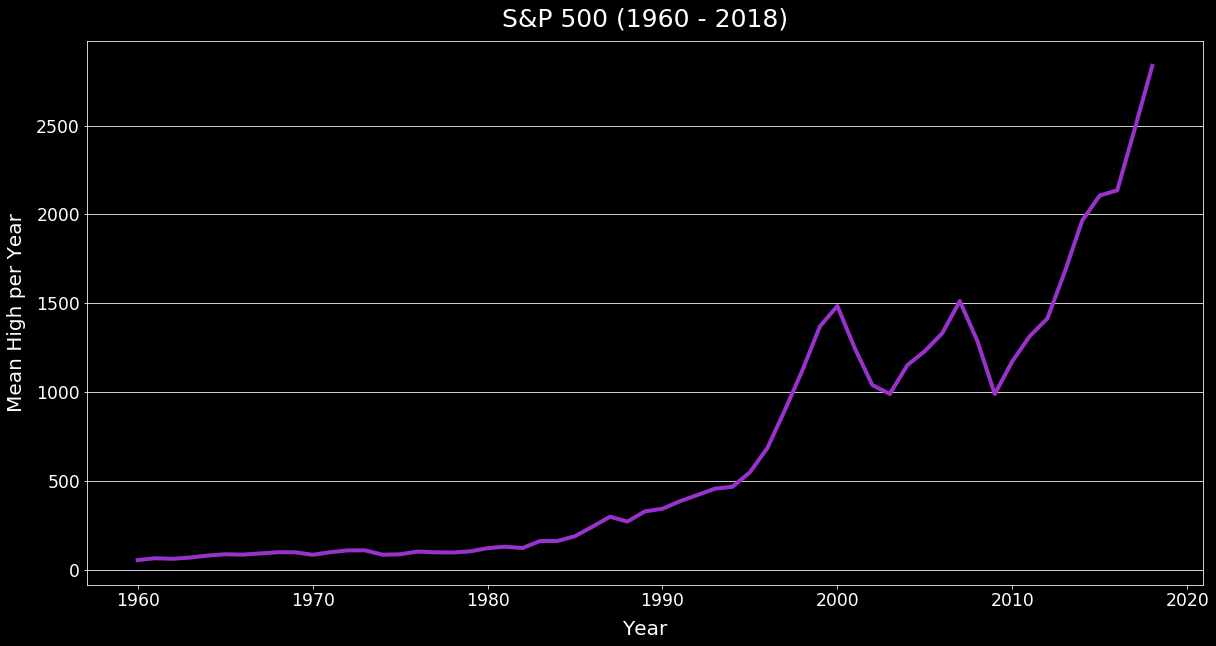

In [20]:
# plot
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.title("S&P 500 (1960 - 2018)", fontsize=25, pad=15)
plt.xlabel("Year",  fontsize=20, labelpad=10)
plt.ylabel("Mean High per Year", fontsize=20, labelpad=10)
plt.plot(years, dollars, color='darkorchid', linewidth=4)
plt.xticks(size='xx-large')
plt.yticks(size='xx-large')
plt.grid(axis='y')
plt.savefig("../Images/stock-lineplot.png",bbox_inches="tight")
plt.show()